### Data sets breif:
For this blog we are considering the One Direction - Spotify Charts History collected over the years And The album popularity data compared to other artists from spotify. there are three types of data containing different values and data inputs.


#### Importing datasets and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\Divija Cherukuri\Downloads\Oned_charts.xlsx")
data.head(9)

,Song,Lyricist,Album,Year,Peak_streams
0,18,Ed Sheeran,Four,2014,144051381.0
1,A.M.,Niall Horan,Made in the A.M.,2015,13323733.0
2,Act my Age,John Ryan,Four,2014,2022810.0
3,Alive,Julian Bunetta,Midnight Memories,2013,2022810.0
4,Another World,Achraf Jannusi,Up All Night,2011,34515257.0
5,Back for You,Kristoffer Fogelmark,Take Me Home,2012,73238605.0
6,Best Song Ever,Wayne Hector,Midnight Memories,2013,20507912.0
7,Better than Words,Jamie Scott,Midnight Memories,2013,96042338.0
8,Change My Mind,Rami Yacoub,Take Me Home,2012,86446560.0


In [101]:
#Spotify all artists data
data1 = pd.read_csv(r"C:\Users\Divija Cherukuri\Downloads\dataset.csv")
#Albumwise sales and updated streams in 2025
data2 = pd.read_csv(r"C:\Users\Divija Cherukuri\Downloads\Oned.csv")

## Dataset No.1: Analysis on Songs and Streams albumwise

Let us look how the data is spread in this dataset and what the columns are, what the datatypes are.

In [4]:
print(data.columns)
print(data.info())
print("The number of rows and columns are",data.shape)
data.describe()

Index(['Song', 'Lyricist', 'Album', 'Year', 'Peak_streams'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song          94 non-null     object 
 1   Lyricist      94 non-null     object 
 2   Album         89 non-null     object 
 3   Year          94 non-null     int64  
 4   Peak_streams  90 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ KB
None
The number of rows and columns are (94, 5)


,Year,Peak_streams
count,94.000000,9.000000e+01
mean,2012.872340,6.513855e+07
std,1.468186,1.625850e+08
min,2010.000000,0.000000e+00
25%,2012.000000,2.025391e+06
50%,2013.000000,1.577848e+07
75%,2014.000000,8.632151e+07
max,2015.000000,1.480993e+09


#### Outliers: detection

<Axes: >

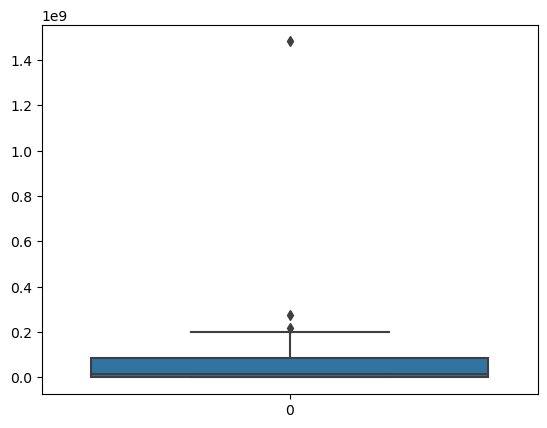

In [6]:
sns.boxplot(data['Peak_streams'])

In [7]:
data.sort_values(by='Peak_streams', ascending=False).iloc[0]

Song            Night Changes
Lyricist          Jamie Scott
Album                    Four
Year                     2014
Peak_streams     1480993263.0
Name: 54, dtype: object

There appears to be one outlier is extreme away from the whole data. but when we observe the input, "night changes" has highest streams on spoitfy. Since this song is biggest hit of One Direction, this datapoint is accurate and not a mistake.

#### Null values: detection and treatment

In [8]:
data.isna().sum()

Song            0
Lyricist        0
Album           5
Year            0
Peak_streams    4
dtype: int64

Seems like the data has few missing values in it in the album name, peak streams. As the given data is familiar let us consider looking at the null values and why they are Null.

In [9]:
data[data.Album.isna()]

,Song,Lyricist,Album,Year,Peak_streams
19,Forever Young • [note 1],Bernhard Lloyd,NaN,2010,0.0
21,God Only Knows •,BBC Music and Friends,NaN,2014,NaN
26,Heroes •,David Bowie,NaN,2010,NaN
60,One Way or Another (Teenage Kicks) • [note 2],Debbie Harry,NaN,2013,NaN
91,Wishing on a Star •,Billie Rae Calvin,NaN,2011,NaN


As per the values we see, they are all null because they do not belong to any album written. means they are singles dropped by the band. so let us drop the Null values as we are only considering the music made by one direction officially in albums

In [10]:
clean_data = data.dropna(subset=["Album"])
clean_data

,Song,Lyricist,Album,Year,Peak_streams
0,18,Ed Sheeran,Four,2014,144051381.0
1,A.M.,Niall Horan,Made in the A.M.,2015,13323733.0
2,Act my Age,John Ryan,Four,2014,2022810.0
3,Alive,Julian Bunetta,Midnight Memories,2013,2022810.0
4,Another World,Achraf Jannusi,Up All Night,2011,34515257.0
...,...,...,...,...,...
88,What Makes You Beautiful,Rami Yacoub,Up All Night,2011,96437796.0
89,Where Do Broken Hearts Go,Harry Styles,Four,2014,10583516.0
90,Why Don't We Go There,Steve Robson,Midnight Memories,2013,77763693.0
92,Wolves,Niall Horan,Made in the A.M.,2015,8288062.0


In [11]:
clean_data.describe()

,Year,Peak_streams
count,89.000000,8.900000e+01
mean,2012.943820,6.587044e+07
std,1.425096,1.633570e+08
min,2011.000000,7.788000e+03
25%,2012.000000,2.033134e+06
50%,2013.000000,1.650692e+07
75%,2014.000000,8.644656e+07
max,2015.000000,1.480993e+09


In [12]:
print("The highest and lowest streams in the dataset are",data.Peak_streams.max(),"and",clean_data.Peak_streams.min())
print("The total average streams on spotify are:",data.Peak_streams.mean())

The highest and lowest streams in the dataset are 1480993263.0 and 7788.0
The total average streams on spotify are: 65138545.07777778


##### Checking for duplicates

In [13]:
clean_data[clean_data.duplicated()]

,Song,Lyricist,Album,Year,Peak_streams


Hence there are no duplicates, we can now further move on to the visualization

#### Visualization of the found data

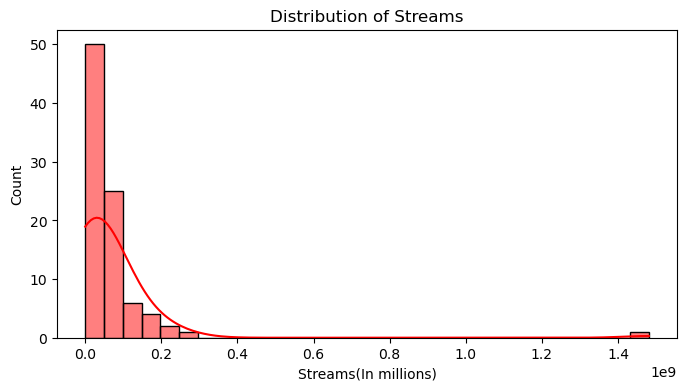

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(clean_data['Peak_streams'], bins=30, kde=True,color = 'Red')
plt.title("Distribution of Streams")
plt.xlabel("Streams(In millions)")
plt.ylabel("Count")
plt.show()

##### Streams and songs per album

In [158]:
songs_peralb = clean_data["Album"].value_counts()
print('the number of songs per albumn are:\n', songs_peralb)

the number of songs per albumn are:
 Take Me Home         20
Midnight Memories    18
Up All Night         18
Made in the A.M.     17
Four                 15
Perfect EP            1
Name: Album, dtype: int64


In [159]:
albums = clean_data['Album'].value_counts()

Text(0.5, 1.0, 'Distribution of Songs per Album')

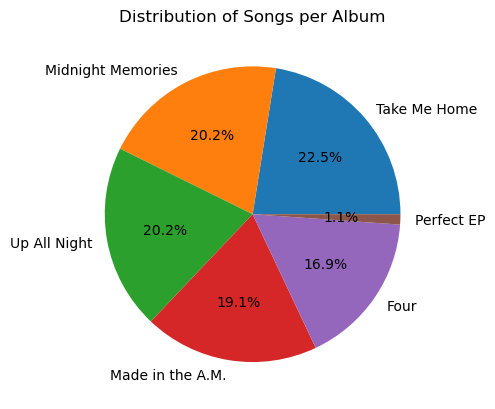

In [160]:
plt.pie(albums, labels=albums.index, autopct='%1.1f%%')
plt.title("Distribution of Songs per Album")


As per above plots, Take me home album has more number of songs in quantity, but Four has more streams on spotify compared.

##### Top Streamed songs

In [17]:
top_10 = data.sort_values(by='Peak_streams', ascending=False).head(10)
top_10.head(4)

,Song,Lyricist,Album,Year,Peak_streams
54,Night Changes,Jamie Scott,Four,2014,1.480993e+09
15,Drag Me Down,Julian Bunetta,Made in the A.M.,2015,2.769799e+08
62,Perfect,Harry Styles,Made in the A.M.,2015,2.165668e+08
23,Half a Heart,Steve Robson,Midnight Memories,2013,1.986772e+08


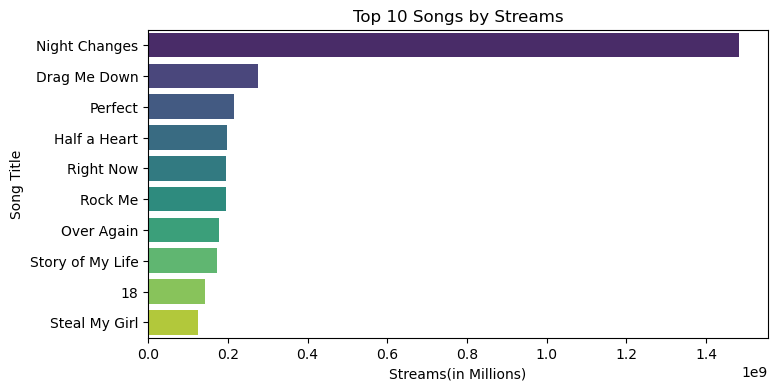

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Peak_streams', y='Song', data=top_10, palette='viridis')
plt.title("Top 10 Songs by Streams")
plt.xlabel("Streams(in Millions)")
plt.ylabel("Song Title")
plt.show()

## Dataset No.2: Analysis on all artists data from Spotify

In [19]:
data1

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,length,explicit,danceability,energy,key,acousticness,liveness,valence,tempo,track_genre
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.62,False,0.714,0.472,2,0.01300,0.2660,0.238,131.121,dance
1,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.62,False,0.714,0.472,2,0.01300,0.2660,0.238,131.121,pop
2,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,3.32,False,0.621,0.782,2,0.01250,0.2300,0.550,128.033,hip-hop
3,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.92,True,0.561,0.965,7,0.00383,0.3710,0.304,128.040,dance
4,30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.92,True,0.561,0.965,7,0.00383,0.3710,0.304,128.040,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,1.95,False,0.696,0.715,7,0.34000,0.1800,0.959,130.021,world-music
113996,113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,2.92,False,0.581,0.436,8,0.23200,0.0547,0.412,120.138,world-music
113997,113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,3.23,False,0.413,0.437,1,0.04200,0.1460,0.102,120.259,world-music
113998,113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,3.62,False,0.607,0.884,2,0.02300,0.2260,0.555,139.988,world-music


In [20]:
print(data1.columns)
print(data1.info())
print("The number of rows and columns are",data1.shape)
data1.describe()

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'length', 'explicit', 'danceability', 'energy', 'key',
       'acousticness', 'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    114000 non-null  int64  
 1   track_id      114000 non-null  object 
 2   artists       113999 non-null  object 
 3   album_name    113999 non-null  object 
 4   track_name    113999 non-null  object 
 5   popularity    114000 non-null  int64  
 6   length        114000 non-null  float64
 7   explicit      114000 non-null  bool   
 8   danceability  114000 non-null  float64
 9   energy        114000 non-null  float64
 10  key           114000 non-null  int64  
 11  acousticness  114000 non-null  float64
 12  liveness      114000 non-nu

,Unnamed: 0,popularity,length,danceability,energy,key,acousticness,liveness,valence,tempo
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,3.800488,0.566800,0.641383,5.309140,0.314910,0.213553,0.474068,122.147837
std,32909.109681,22.305078,1.788299,0.173542,0.251529,3.559987,0.332523,0.190378,0.259261,29.978197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,2.900000,0.456000,0.472000,2.000000,0.016900,0.098000,0.260000,99.218750
50%,56999.500000,35.000000,3.550000,0.580000,0.685000,5.000000,0.169000,0.132000,0.464000,122.017000
75%,85499.250000,50.000000,4.360000,0.695000,0.854000,8.000000,0.598000,0.273000,0.683000,140.071000
max,113999.000000,100.000000,87.290000,0.985000,1.000000,11.000000,0.996000,1.000000,0.995000,243.372000


Few columns like "Unnamed", "TrackID" do not have any significane to the data, let us drop those acolumns

In [21]:
data1 = data1.drop(['Unnamed: 0','track_id'],axis=1)

In [22]:
data1

,artists,album_name,track_name,popularity,length,explicit,danceability,energy,key,acousticness,liveness,valence,tempo,track_genre
0,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.62,False,0.714,0.472,2,0.01300,0.2660,0.238,131.121,dance
1,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.62,False,0.714,0.472,2,0.01300,0.2660,0.238,131.121,pop
2,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,3.32,False,0.621,0.782,2,0.01250,0.2300,0.550,128.033,hip-hop
3,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.92,True,0.561,0.965,7,0.00383,0.3710,0.304,128.040,dance
4,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.92,True,0.561,0.965,7,0.00383,0.3710,0.304,128.040,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,1.95,False,0.696,0.715,7,0.34000,0.1800,0.959,130.021,world-music
113996,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,2.92,False,0.581,0.436,8,0.23200,0.0547,0.412,120.138,world-music
113997,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,3.23,False,0.413,0.437,1,0.04200,0.1460,0.102,120.259,world-music
113998,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,3.62,False,0.607,0.884,2,0.02300,0.2260,0.555,139.988,world-music


In [23]:
data1.describe()

,popularity,length,danceability,energy,key,acousticness,liveness,valence,tempo
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,3.800488,0.566800,0.641383,5.309140,0.314910,0.213553,0.474068,122.147837
std,22.305078,1.788299,0.173542,0.251529,3.559987,0.332523,0.190378,0.259261,29.978197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.900000,0.456000,0.472000,2.000000,0.016900,0.098000,0.260000,99.218750
50%,35.000000,3.550000,0.580000,0.685000,5.000000,0.169000,0.132000,0.464000,122.017000
75%,50.000000,4.360000,0.695000,0.854000,8.000000,0.598000,0.273000,0.683000,140.071000
max,100.000000,87.290000,0.985000,1.000000,11.000000,0.996000,1.000000,0.995000,243.372000


##### Null Values: Detection and Treatment

In [24]:
print(data1[data1.artists.isna()])
data1.isnull().sum()     

       artists album_name track_name  popularity  length  explicit  \
106973     NaN        NaN        NaN           0     0.0     False   

        danceability  energy  key  acousticness  liveness  valence    tempo  \
106973         0.501   0.583    7          0.69    0.0747    0.734  138.391   

       track_genre  
106973       k-pop  


artists         1
album_name      1
track_name      1
popularity      0
length          0
explicit        0
danceability    0
energy          0
key             0
acousticness    0
liveness        0
valence         0
tempo           0
track_genre     0
dtype: int64

In [25]:
data1 = data1.dropna()
data1.isnull().sum()

artists         0
album_name      0
track_name      0
popularity      0
length          0
explicit        0
danceability    0
energy          0
key             0
acousticness    0
liveness        0
valence         0
tempo           0
track_genre     0
dtype: int64

##### Duplicates: Checking and Treatment

In [26]:
data1[data1.duplicated()]

,artists,album_name,track_name,popularity,length,explicit,danceability,energy,key,acousticness,liveness,valence,tempo,track_genre
128,Sam Smith,In The Lonely Hour,I'm Not The Only One,88,3.99,False,0.677,0.485,5,0.529000,0.0766,0.493,82.001,dance
957,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,5.58,False,0.427,0.900,11,0.116000,0.1190,0.599,104.655,alt-rock
2930,Regard;Years & Years,Hallucination,Hallucination,74,2.91,True,0.687,0.788,6,0.012100,0.3580,0.669,123.020,edm
5081,Eddie Money,Can't Hold Back,Take Me Home Tonight,70,3.52,False,0.608,0.768,1,0.101000,0.0942,0.748,132.699,hard-rock
7143,AC/DC,For Those About to Rock (We Salute You),For Those About to Rock (We Salute You),67,5.74,False,0.370,0.919,4,0.000376,0.4900,0.471,134.021,hard-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112687,Don McLean,Best 70s Rock Tunes,If We Try,0,3.59,False,0.565,0.403,2,0.674000,0.1030,0.480,109.620,songwriter
112928,Surfaces,Best Road Trip Pop Tunes,Next Thing (Loverboy),0,3.05,False,0.719,0.415,2,0.558000,0.2930,0.463,160.020,soul
113086,The Jackson 5,Jingle Bell Rock 2022,Santa Claus Is Coming To Town,0,2.40,False,0.691,0.776,0,0.458000,0.3300,0.961,146.861,soul
113212,The Supremes,Best R&B Tunes,If My Friends Could See Me Now/Nothing Can Sto...,0,3.32,False,0.300,0.579,0,0.540000,0.9810,0.707,77.150,soul


In [27]:
data1.drop_duplicates(keep='first',inplace=True)

C:\Users\Divija Cherukuri\AppData\Local\Temp\ipykernel_1180\1204107160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(keep='first',inplace=True)


Now that the null values and duplicates are treated, we can peform analysis on the clean data.

In [28]:
Oned_values=data1[data1['artists']==('One Direction')]
Oned_values

,artists,album_name,track_name,popularity,length,explicit,danceability,energy,key,acousticness,liveness,valence,tempo,track_genre
148,One Direction,FOUR (Deluxe),Night Changes,88,3.78,False,0.672,0.520,8,0.85900,0.1150,0.370,120.001,pop
444,One Direction,Up All Night,What Makes You Beautiful,84,3.33,False,0.726,0.787,4,0.00900,0.0596,0.888,124.990,pop
601,One Direction,Midnight Memories (Deluxe),Story of My Life,83,4.09,False,0.600,0.663,3,0.22500,0.1190,0.286,121.070,pop
1125,One Direction,FOUR (Deluxe),Steal My Girl,80,3.80,False,0.536,0.768,10,0.00433,0.1140,0.545,77.217,pop
1134,One Direction,Made In The A.M. (Deluxe Edition),Drag Me Down,80,3.20,False,0.730,0.703,0,0.10900,0.0657,0.595,138.113,pop


False

The dataset has columns artist:name of the artist, album_name: which album does the song belong to, track_name: name of the song, popularity: on scale of 0-100, how popular is the song as per the number of searches, length: duration of the song in minutes, explicit: if the lyrics have explicit/adult lyrics or not; danceability	energy	key	acousticness	liveness	valence	tempo are values recorded on scale 0-1 and Genre: which genre does the song belong to.

It seems that "Night Changes" from FOUR has got Highest popularity among all the albums as well as highest streams of whole.

In [29]:
album_popularity = Oned_values.groupby('album_name')['popularity'].mean().sort_values(ascending=False)
print(album_popularity)

album_name
FOUR (Deluxe)                        84.0
Up All Night                         84.0
Midnight Memories (Deluxe)           83.0
Made In The A.M. (Deluxe Edition)    80.0
Name: popularity, dtype: float64


In [196]:
dancable = Oned_values.sort_values(by='danceability', ascending=False)
dance= data[data['Song']=='Drag Me Down'].Peak_streams

print("The Highest dancable song is: ",dancable.iloc[0].track_name, 'and it has streams of:',dance)

The Highest dancable song is:  Drag Me Down and it has streams of: 15    276979851.0
Name: Peak_streams, dtype: float64


The order of danceability of these songs is not related to the streams at all. when we see the number of streams it stands to just be a number.

In [185]:
Oned_values.sort_values(by='energy', ascending=False)

,artists,album_name,track_name,popularity,length,explicit,danceability,energy,key,acousticness,liveness,valence,tempo,track_genre,year
444,One Direction,Up All Night,What Makes You Beautiful,84,3.33,False,0.726,0.787,4,0.00900,0.0596,0.888,124.990,pop,2011.0
1125,One Direction,FOUR (Deluxe),Steal My Girl,80,3.80,False,0.536,0.768,10,0.00433,0.1140,0.545,77.217,pop,NaN
1134,One Direction,Made In The A.M. (Deluxe Edition),Drag Me Down,80,3.20,False,0.730,0.703,0,0.10900,0.0657,0.595,138.113,pop,NaN
601,One Direction,Midnight Memories (Deluxe),Story of My Life,83,4.09,False,0.600,0.663,3,0.22500,0.1190,0.286,121.070,pop,NaN
148,One Direction,FOUR (Deluxe),Night Changes,88,3.78,False,0.672,0.520,8,0.85900,0.1150,0.370,120.001,pop,NaN


In [ ]:
Though

C:\Users\Divija Cherukuri\AppData\Local\Temp\ipykernel_1180\1944751716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(album_popularity,kde=True)


<Axes: xlabel='popularity', ylabel='Density'>

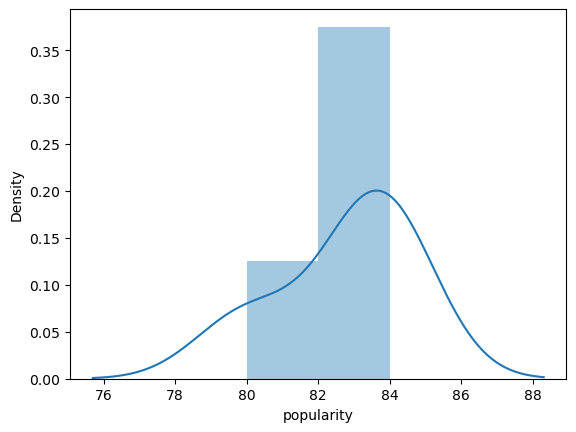

In [90]:
sns.distplot(Oned_values['popularity'],kde=True)

C:\Users\Divija Cherukuri\AppData\Local\Temp\ipykernel_1180\1197808618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),cmap='PiYG')


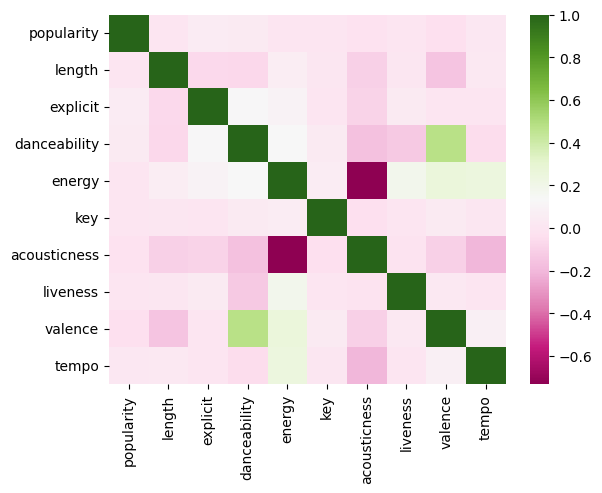

In [100]:
sns.heatmap(data1.corr(),cmap='PiYG')
plt.show()

This heatmap shows tthe correlation of the values with eachother. we can see least correlated are acousticness and energy are negatively related, where are danceability and valence have a higher correlation of 0.4

## Dataset No.3: Analysis on all albums sales

In [102]:
data2

,Album,Year,Studio albums (EAS),Other LPs (EAS),Physical singles (units sold),Digital singles (units sold),Streams(03/20/25),Streams increase,Total EAS
0,Take Me Home,2012,"63,00,000","19,15,000","20,000","1,21,00,000","49,25,000","Av: 1,380 Ld: 1,460","1,49,61,000"
1,Up All Night,2011,"62,50,000","27,45,000","57,000","1,52,00,000","48,45,000","Av.: 1,420 Ld.: 2,110","1,61,37,000"
2,Midnight Memories,2013,"52,50,000","6,04,000","27,000","1,25,00,000","69,81,000","Av.: 2,050 Ld.:3,520","1,47,18,000"
3,Four,2014,"34,00,000",0,"10,000","78,00,000","71,45,000","Av.: 2,130 Ld.: 3,880","1,17,18,000"
4,Made In The A.M.,2015,"27,00,000",0,10000,"73,00,000","64,73,000","Av.: 1,690 Ld.: 2,130","1,02,68,000"


The dataset has equivalent album sale vales in differnt places and types of album.
studion albums(EAS) is equivalent album sales of these albums collectively of all songs.
Physical singles indicate the CD's or vinyl records sold, Digital singles are sales of online purchases of the songs per album
finally stream(03/20/25) are updated streams from arount the world.

##### Null values and duplicates Detection, treatment
We do see 2 Zeros in the dataset. other sales are not mandatory as we have the total sales of album hence dropping should not be a problem

In [202]:
data2 = data2.drop(['Other LPs (EAS)'],axis=1)

In [198]:
data2.duplicated()


0    False
1    False
2    False
3    False
4    False
dtype: bool

There are no duplicate values for this data.

In [199]:
data2.dtypes

Album                            object
Year                              int64
Studio albums (EAS)               int32
Other LPs (EAS)                   int32
Physical singles (units sold)     int32
Digital singles (units sold)      int32
Streams(03/20/25)                 int32
Streams increase                 object
Total EAS                         int32
dtype: object

Let us convert the Float to int so it is easily operable in indexing

In [200]:
data2["Total EAS"] = data2["Total EAS"].astype(int)
data2.dtypes

Album                            object
Year                              int64
Studio albums (EAS)               int32
Other LPs (EAS)                   int32
Physical singles (units sold)     int32
Digital singles (units sold)      int32
Streams(03/20/25)                 int32
Streams increase                 object
Total EAS                         int32
dtype: object

In [204]:
Alb_sales = data2.sort_values("Total EAS", ascending=False)
Alb_sales

,Album,Year,Studio albums (EAS),Physical singles (units sold),Digital singles (units sold),Streams(03/20/25),Streams increase,Total EAS
1,Up All Night,2011,6250000,57000,15200000,4845000,"Av.: 1,420 Ld.: 2,110",16137000
0,Take Me Home,2012,6300000,20000,12100000,4925000,"Av: 1,380 Ld: 1,460",14961000
2,Midnight Memories,2013,5250000,27000,12500000,6981000,"Av.: 2,050 Ld.:3,520",14718000
3,Four,2014,3400000,10000,7800000,7145000,"Av.: 2,130 Ld.: 3,880",11718000
4,Made In The A.M.,2015,2700000,10000,7300000,6473000,"Av.: 1,690 Ld.: 2,130",10268000


In [203]:
top_streams = data2.sort_values("Streams(03/20/25)", ascending=False)
top_streams

,Album,Year,Studio albums (EAS),Physical singles (units sold),Digital singles (units sold),Streams(03/20/25),Streams increase,Total EAS
3,Four,2014,3400000,10000,7800000,7145000,"Av.: 2,130 Ld.: 3,880",11718000
2,Midnight Memories,2013,5250000,27000,12500000,6981000,"Av.: 2,050 Ld.:3,520",14718000
4,Made In The A.M.,2015,2700000,10000,7300000,6473000,"Av.: 1,690 Ld.: 2,130",10268000
0,Take Me Home,2012,6300000,20000,12100000,4925000,"Av: 1,380 Ld: 1,460",14961000
1,Up All Night,2011,6250000,57000,15200000,4845000,"Av.: 1,420 Ld.: 2,110",16137000


Text(0.5, 1.0, 'Total Streams per Album')

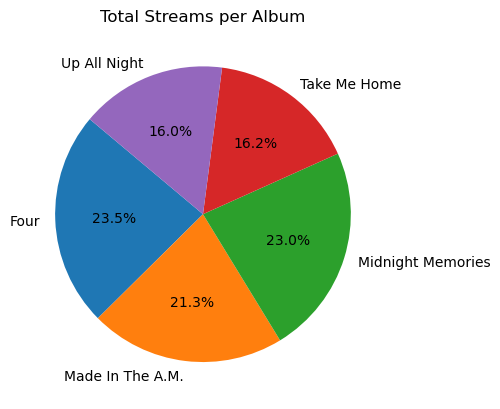

In [153]:
album_streams = data2.groupby('Album')['Streams(03/20/25)'].sum()
plt.pie(album_streams, labels=album_streams.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Streams per Album")

Let us find the correlation between differnt albums and their sales below

In [86]:
data2.corr()

C:\Users\Divija Cherukuri\AppData\Local\Temp\ipykernel_1180\1981098430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,Studio albums (EAS),Other LPs (EAS),Physical singles (units sold),Digital singles (units sold),Streams(03/20/25),Total EAS
Studio albums (EAS),1.000000,0.891198,0.720255,0.931711,-0.738390,0.975464
Other LPs (EAS),0.891198,1.000000,0.846255,0.889237,-0.919259,0.866206
Physical singles (units sold),0.720255,0.846255,1.000000,0.904852,-0.623399,0.812076
Digital singles (units sold),0.931711,0.889237,0.904852,1.000000,-0.667080,0.975243
Streams(03/20/25),-0.738390,-0.919259,-0.623399,-0.667080,1.000000,-0.640461
Total EAS,0.975464,0.866206,0.812076,0.975243,-0.640461,1.000000


C:\Users\Divija Cherukuri\AppData\Local\Temp\ipykernel_1180\3070498311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),cmap='PiYG')


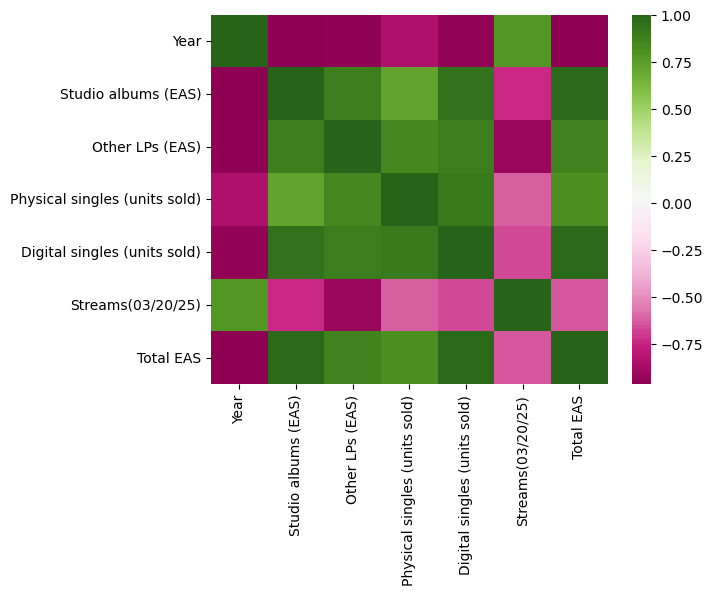

In [134]:
sns.heatmap(data2.corr(),cmap='PiYG')
plt.show()

The lightest areas of the map have a negative relation and darker areas have a positive relation when compared.

In [135]:
data2["Total EAS"].max()

16137000

In [166]:
# Find the album with the highest Total EAS
best_sales = data2.loc[data2["Total EAS"].idxmax(), "Album"]
most_streamed = data2.loc[data2["Streams(03/20/25)"].idxmax(), "Album"]

print("Highest sold album is:", best_sales,"\nAnd the most streamed album of all is:",most_streamed)

Highest sold album is: Up All Night 
And the most streamed album of all is: Four
